# Jupyter Notebook for Oura Ring Sleepdata

## Introduction
Oura provides data that can be retrieved from their website with an API call.
There are three parameters that are available in 5 minute intervals: sleep stage, heart rate (hr) and heart rate variability (HRV). 
With this notebook you can retrieve data and load it into a Pandas df.
Then, do some simple analysis and create some graphs.

Create an account and get your credentials from the Oura Documents page: https://cloud.ouraring.com/docs

## Contents:

0. Installation and tokens
1. Sleep API call and load (some) data into Pandas df
2. Basic analysis
3. Create some graphs with it
4. Store the dataframe

## 0. Installation and tokens

In [1]:
!pip install oura

In [2]:
from oura import OuraClient
# get your credentials from oura, see: https://cloud.ouraring.com/docs/.
# You will need a client_id, client_secret and a personal access token (PAT). 

import notebooks_config
#I store all my credentials in a notebooks_config.py file. 
#This file is then included in the .gitignore list so I can share the notebooks on GitHub.  

oura_pat = notebooks_config.oura_pat #
oura_client_id = notebooks_config.oura_client_id
oura_client_secret = notebooks_config.oura_client_secret

client = OuraClient(personal_access_token=oura_pat)
oura = OuraClient(oura_client_id, oura_client_secret, oura_pat)
print('done')

ModuleNotFoundError: No module named 'notebooks_config'

## 1. Sleep API call

In [2]:
#get your personal info
oura.user_info()

{'age': 45,
 'weight': 93.0,
 'height': 180,
 'gender': 'male',
 'email': 'michiel.bontenbal@gmail.com'}

In [5]:
# Sleep Summary
result = oura.sleep_summary(start='2022-01-04', end='2022-01-05')
data = result['sleep'][0] #select the first item from the list
print(data)

{'summary_date': '2022-01-04', 'period_id': 0, 'is_longest': 1, 'timezone': 60, 'bedtime_end': '2022-01-05T08:36:20+01:00', 'bedtime_start': '2022-01-04T22:56:20+01:00', 'breath_average': 14.875, 'duration': 34800, 'total': 29730, 'awake': 5070, 'rem': 9840, 'deep': 3840, 'light': 16050, 'midpoint_time': 17130, 'efficiency': 85, 'restless': 21, 'onset_latency': 180, 'hr_5min': [71, 69, 67, 65, 65, 66, 66, 66, 65, 65, 63, 62, 62, 0, 60, 57, 57, 60, 60, 59, 60, 59, 61, 59, 59, 61, 61, 60, 59, 59, 60, 60, 61, 62, 61, 59, 59, 58, 57, 57, 59, 62, 59, 59, 57, 57, 57, 56, 57, 0, 57, 0, 57, 60, 57, 58, 60, 56, 59, 59, 64, 59, 60, 60, 58, 0, 61, 0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 67, 65, 66, 64, 62, 62, 62, 66, 63, 62, 63, 63, 64, 64, 65, 62, 64, 65, 64, 65, 66, 66, 64, 65, 65, 63, 63, 65, 66, 67, 69, 65, 63, 63, 64, 0, 66, 69], 'hr_average': 61.91, 'hr_lowest': 56.0, 'hypnogram_5min': '42211112222214422222132222222211111222222322222333333222332133344424444234424422222222322233333333333123332

### 1a. Get the start and endtime of sleep

In [6]:
#get the start and endtime as strings
start_time = data['bedtime_start']
end_time = data['bedtime_end']
# convert strings to datetime
from dateutil import parser
start_time_dt = parser.parse(start_time)
end_time_dt = parser.parse(end_time)
print ('start time is '+ str(start_time_dt) + ' and end time is ' + str(end_time_dt))

start time is 2022-01-04 22:56:20+01:00 and end time is 2022-01-05 08:36:20+01:00


### 1b. Get the hypnogram and convert it to a list of integers

In [7]:
#get the hypnogram as one long string
hypnogram = data['hypnogram_5min']

# convert the hypnogram to a list of strings
string_list=[]
string_list[:0]=hypnogram

# convert the list of strings to a list of integers
my_stages=[] #create an empty list for the sleep stages
for i in range(len(string_list)):
    integer = int(string_list[i])
    my_stages.append(integer)
print(my_stages)


[4, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 4, 4, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 1, 3, 3, 3, 4, 4, 4, 2, 4, 4, 4, 4, 2, 3, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4]


### 1c. Get the HR and HRV for 5 min intervals

In [8]:
my_hr = data['hr_5min']
print(my_hr)

[71, 69, 67, 65, 65, 66, 66, 66, 65, 65, 63, 62, 62, 0, 60, 57, 57, 60, 60, 59, 60, 59, 61, 59, 59, 61, 61, 60, 59, 59, 60, 60, 61, 62, 61, 59, 59, 58, 57, 57, 59, 62, 59, 59, 57, 57, 57, 56, 57, 0, 57, 0, 57, 60, 57, 58, 60, 56, 59, 59, 64, 59, 60, 60, 58, 0, 61, 0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 67, 65, 66, 64, 62, 62, 62, 66, 63, 62, 63, 63, 64, 64, 65, 62, 64, 65, 64, 65, 66, 66, 64, 65, 65, 63, 63, 65, 66, 67, 69, 65, 63, 63, 64, 0, 66, 69]


In [9]:
# get the metric for heart rate variability also know as rMSSD
my_HRV = data['rmssd_5min']
print(my_HRV)

[8, 12, 16, 16, 17, 17, 16, 49, 43, 22, 27, 40, 31, 0, 19, 20, 36, 33, 33, 34, 28, 21, 18, 23, 22, 25, 25, 27, 31, 35, 34, 36, 37, 37, 40, 34, 32, 40, 39, 53, 19, 18, 23, 33, 21, 23, 32, 38, 42, 0, 37, 0, 40, 33, 31, 30, 22, 25, 27, 26, 35, 33, 39, 16, 21, 0, 20, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 12, 14, 15, 17, 22, 26, 30, 35, 33, 34, 31, 33, 19, 17, 17, 30, 31, 36, 30, 17, 18, 17, 18, 18, 22, 16, 18, 27, 22, 12, 9, 20, 22, 25, 40, 0, 42, 12]


### 1d. Create a list of starttime of the intervals

In [10]:
import datetime
time_change = datetime.timedelta(minutes=5)
my_startivs = [start_time_dt] #create a list with first item start_time_dt
new_iv=start_time_dt
for i in range(len(my_stages)-1):
    new_iv= new_iv+time_change
    my_startivs.append(new_iv)
#print(my_startivs)
print('done')

done


### 1e. Creating a df and adding the lists to it

In [11]:
#see if all lists have same length
print(len(my_stages), len(my_hr), len(my_HRV), len(my_startivs))

116 117 117 116


In [17]:
# create an empty dataframe
import pandas as pd
sleep_df = pd.DataFrame()

# Add the lists to the dataframe as a 'pd.Series' datatype to prevent a ValueError (different lengths of the lists)
#https://www.geeksforgeeks.org/how-to-fix-length-of-values-does-not-match-length-of-index/
sleep_df['Start_time']=pd.Series(my_startivs)
sleep_df['Stage']= pd.Series(my_stages)
sleep_df['hr']=pd.Series(my_hr)
sleep_df['HRV']=pd.Series(my_HRV)
sleep_df

,Start_time,Stage,hr,HRV
0,2022-01-04 22:56:20+01:00,4,71,8
1,2022-01-04 23:01:20+01:00,2,69,12
2,2022-01-04 23:06:20+01:00,2,67,16
3,2022-01-04 23:11:20+01:00,1,65,16
4,2022-01-04 23:16:20+01:00,1,65,17
...,...,...,...,...
111,2022-01-05 08:11:20+01:00,2,63,22
112,2022-01-05 08:16:20+01:00,2,63,25
113,2022-01-05 08:21:20+01:00,3,64,40
114,2022-01-05 08:26:20+01:00,3,0,0


In [10]:
sleep_df.dtypes

Start_time    datetime64[ns, tzoffset(None, 3600)]
Stage                                        int64
hr                                           int64
HRV                                          int64
dtype: object

In [11]:
# replace 0's with NaN
import numpy as np
sleep_df = sleep_df.replace(0, np.NaN)
sleep_df.tail()

,Start_time,Stage,hr,HRV
83,2022-01-01 08:55:11+01:00,3,66.0,25.0
84,2022-01-01 09:00:11+01:00,4,67.0,20.0
85,2022-01-01 09:05:11+01:00,4,67.0,17.0
86,2022-01-01 09:10:11+01:00,4,68.0,21.0
87,2022-01-01 09:15:11+01:00,4,NaN,NaN


In [12]:
sleep_df.describe()

,Stage,hr,HRV
count,88.000000,70.000000,70.000000
mean,2.318182,63.071429,26.071429
std,0.953463,2.509815,7.793199
min,1.000000,57.000000,10.000000
25%,2.000000,61.000000,20.000000
50%,2.000000,63.000000,27.000000
75%,3.000000,65.000000,31.000000
max,4.000000,68.000000,51.000000


## 2. Do some basic analysis

In [16]:
hr_mean =sleep_df['hr'].mean()
HRV_mean=sleep_df['HRV'].mean()
print('Average hr is: ' + str(round(hr_mean,1))+ ' and average HRV is ' + str(round(HRV_mean,1)))

Average hr is: 61.3 and average HRV is 26.3


In [17]:
hr_min =sleep_df['hr'].min()
HRV_min=sleep_df['HRV'].min()
print('Lowest hr is: ' + str(round(hr_min,1))+ ' and Lowest HRV is ' + str(round(HRV_min,1)))

Lowest hr is: 58.0 and Lowest HRV is 13.0


In [20]:
hr_max =sleep_df['hr'].max()
HRV_max=sleep_df['HRV'].max()
print('Highest hr is: ' + str(round(hr_max,1))+ ' and highest HRV is ' + str(round(HRV_max,1)))

Highest hr is: 70.0 and highest HRV is 48.0


In [21]:
hr_median =sleep_df['hr'].median()
HRV_median=sleep_df['HRV'].median()
print('Median hr is: ' + str(round(hr_median,1))+ ' and median HRV is ' + str(round(HRV_median,1)))

Median hr is: 60.0 and median HRV is 24.0


In [22]:
deep_sleep = my_stages.count(1)
deep_sleep_perc= round((deep_sleep/len(my_stages)*100),2)
print('Deep sleep was ' + str(deep_sleep*5) + ' minutes. That is ' + str(deep_sleep_perc)+ ' % of the time.')

Deep sleep was 60 minutes. That is 21.43 % of the time.


## 3. Create graphs

In [20]:
my_counts = sleep_df['Stage'].value_counts()
my_counts

2    39
3    28
1    24
4     7
Name: Stage, dtype: int64

<AxesSubplot:title={'center':'stages'}, ylabel='Frequency'>

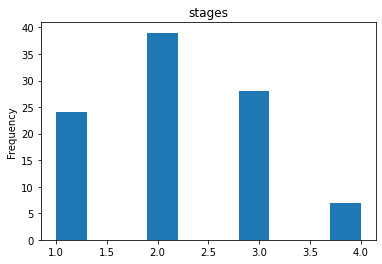

In [21]:
# for a histogram use this pattern: name_df['column'].plot.hist(title='Genome Size Histogram')
sleep_df['Stage'].plot.hist(title='stages')

<AxesSubplot:xlabel='Start_time', ylabel='hr'>

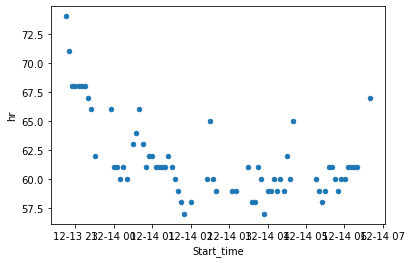

In [22]:
sleep_df.plot.scatter(x='Start_time', y='hr', s=None, c=None)

<AxesSubplot:xlabel='Start_time', ylabel='HRV'>

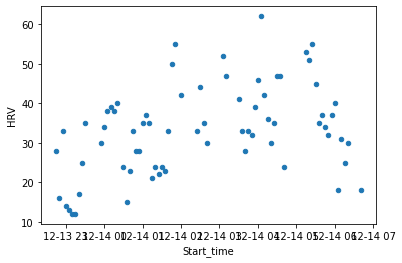

In [23]:
sleep_df.plot.scatter(x='Start_time', y='HRV', s=None, c=None)

<AxesSubplot:xlabel='Start_time', ylabel='Stage'>

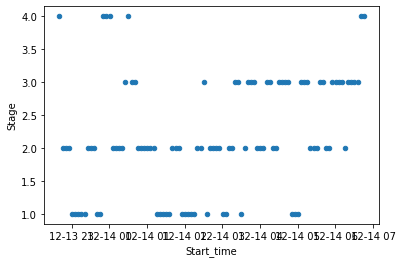

In [24]:
sleep_df.plot.scatter(x='Start_time', y='Stage', s=None, c=None)

## 4. Store df as csv

In [13]:
#naming pattern: 
sleep_df.to_csv('sleep_df_oura_20211231-01.csv')